### Import libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import copy

In [ ]:
# Install any extra imports
# !pip install pandas
# !pip install seaborn

### Certificate Of Authenticity
<b>Author:</b> Eric Cacciavillani
<br>
<b>Class:</b> DAT-330-01
<br>
<b>Date:</b> Febuary 24, 2019
<br>
<b>Certification of Authenticity: </b>
<br>
 I certify that this is entirely my own work,
 except where I have given fully documented
 references to the work of others.
 I understand the definition and consequences of
 plagiarism and acknowledge that the assessor of this assignment may,
 for the purpose of assessing this assignment reproduce this assignment
 and provide a copy to another member of academic staff and / or communicate
 a copy of this assignment to a plagiarism checking service(which may then
 retain a copy of this assignment on its database for the purpose
 of future plagiarism checking).

### Define objects and functions

In [2]:
class DataFrameFeatureTypesHolder:

    """
        Seperates the features based off of dtypes
        to better keep track of feature changes over time.
        Should only be used for manipulation of features.
    """

    def __init__(self,
                 categorical_features,
                 integer_features,
                 float_features):

        self.__categorical_features = categorical_features
        self.__numerical_features = integer_features | float_features
        self.__integer_features = integer_features
        self.__float_features = float_features

    # ---Getters/Appenders

    # Numerical
    def get_numerical_features(self):
        return list(self.__numerical_features)

    def get_integer_features(self):
        return list(self.__integer_features)

    def append_integer_features(self,
                                feature_name):
        self.__integer_features |= set(feature_name)
        self.__numerical_features |= set(feature_name)

    def get_float_features(self):
        return list(self.__float_features)

    def append_float_features(self,
                              feature_name):
        self.__float_features |= set(feature_name)
        self.__numerical_features |= set(feature_name)

    # Categorical
    def get_categorical_features(self):
        return list(self.__categorical_features)

    def append_categorical_features(self):
        self.__categorical_features |= set(feature_name)

    # ---Remover
    def remove(self,
               feature_name):
        try:
            self.__categorical_features.remove(feature_name)
        except KeyError:
            pass

        try:
            self.__numerical_features.remove(feature_name)
        except KeyError:
            pass

        try:
            self.__integer_features.remove(feature_name)
        except KeyError:
            pass

        try:
            self.__float_features.remove(feature_name)
        except KeyError:
            pass

    def display_all(self):
        print("Categorical Features: {0}\n".format(
            self.__categorical_features))
        print("Numerical Features: {0}\n".format(
            self.__numerical_features))
        print("Integer Features: {0}\n".format(
            self.__integer_features))
        print("Float Features: {0}\n".format(
            self.__float_features))

In [3]:
def display_rank_graph(feature_names, metric,
                       title="", y_title="", x_title=""):
    """
        Darker colors have higher rankings (values)
    """
    plt.figure(figsize=(7, 7))

    # Init color ranking fo plot
    # Ref: http://tinyurl.com/ydgjtmty
    pal = sns.color_palette("GnBu_d", len(metric))
    rank = np.array(metric).argsort().argsort()
    ax = sns.barplot(y=feature_names, x=metric,
                     palette=np.array(pal[::-1])[rank])
    plt.xticks(rotation=0, fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(x_title, fontsize=20, labelpad=20)
    plt.ylabel(y_title, fontsize=20, labelpad=20)
    plt.title(title, fontsize=15)
    plt.show()
    plt.close()

# I am this lazy yes...
def vertical_spacing(spaces=1):
    for _ in range(0, spaces):
        print()

## 1.) Import and load dataset

In [4]:
gaming_dataset = pd.read_csv('datasets/Video_Games_Sales_as_at_22_Dec_2016.csv', low_memory=False)
gaming_dataset.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Count the nans

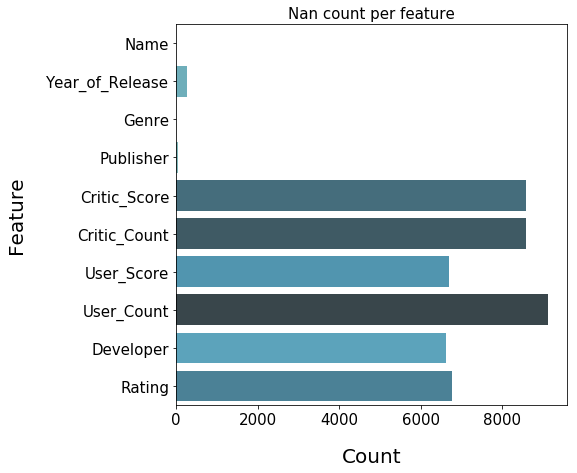

In [5]:
feature_nan_counts = {}
for feature in gaming_dataset.columns:
    nan_count = gaming_dataset[feature].isna().sum()
    
    # Ignore if non nans found
    if nan_count > 0:
        feature_nan_counts[feature] = nan_count

# Graph rank feature nan count
display_rank_graph(feature_names=list(feature_nan_counts.keys()),
                   metric=list(feature_nan_counts.values()),
                   title="Nan count per feature",
                   y_title="Feature",
                   x_title="Count")

## 2.) Quick fixes

## Fix datatypes

In [6]:
gaming_dataset.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [7]:
gaming_dataset["User_Score"] = gaming_dataset["User_Score"].replace('tbd', np.nan)
gaming_dataset["User_Score"] = gaming_dataset["User_Score"].astype(float)
gaming_dataset.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

## 3.) Data Analysis

In [8]:
corr_metrics = gaming_dataset.corr()
corr_metrics.style.background_gradient()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1,-0.0925619,0.00384179,-0.168386,0.0376997,-0.0764328,0.011411,0.223407,-0.267851,0.175339
NA_Sales,-0.0925619,1,0.765336,0.449598,0.638654,0.94101,0.240755,0.295413,0.0861999,0.246429
EU_Sales,0.00384179,0.765336,1,0.435068,0.722796,0.901239,0.220752,0.277533,0.0553367,0.28336
JP_Sales,-0.168386,0.449598,0.435068,1,0.291096,0.6123,0.152593,0.180219,0.125598,0.075638
Other_Sales,0.0376997,0.638654,0.722796,0.291096,1,0.749242,0.198554,0.251639,0.057119,0.238982
Global_Sales,-0.0764328,0.94101,0.901239,0.6123,0.749242,1,0.245471,0.303571,0.0881392,0.265012
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1,0.425504,0.580878,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1,0.194133,0.362334
User_Score,-0.267851,0.0861999,0.0553367,0.125598,0.057119,0.0881392,0.580878,0.194133,1,0.0270439
User_Count,0.175339,0.246429,0.28336,0.075638,0.238982,0.265012,0.264376,0.362334,0.0270439,1


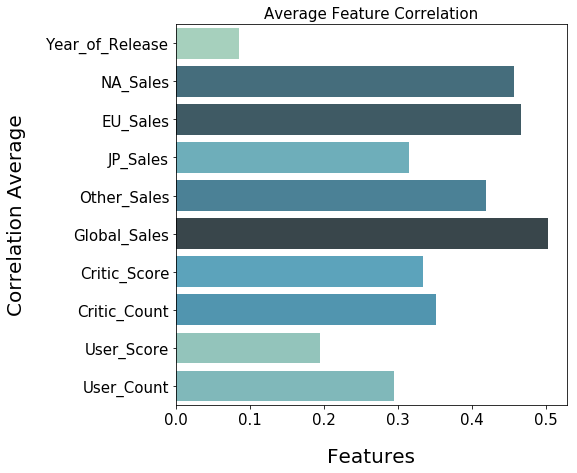

In [9]:
# Get the correlation means of each feature
corr_feature_means = []
for feature_name in list(corr_metrics.columns):
    corr_feature_means.append(corr_metrics[feature_name].mean())

# Graph correlation by rank
display_rank_graph(feature_names=list(corr_metrics.columns),
                   metric=corr_feature_means,
                   title="Average Feature Correlation",
                   y_title="Correlation Average",
                   x_title="Features")

## Init DataFrameFeatureTypesHolder for better analysis

In [10]:
df_features = DataFrameFeatureTypesHolder(categorical_features=set({"Name",
                                                                    "Platform", 
                                                                    "Genre",
                                                                    "Publisher",
                                                                    "Devolper",
                                                                    "Rating"}),
                                          integer_features=set({"Critic_Count", "User_Count", "Year_of_Release"}),
                                          float_features=set(
                                              {"NA_Sales",
                                               "EU_Sales",
                                               "JP_Sales",
                                               "Other_Sales",
                                               "Global_Sales",
                                               "Critic_Score",
                                               "User_Score"}))

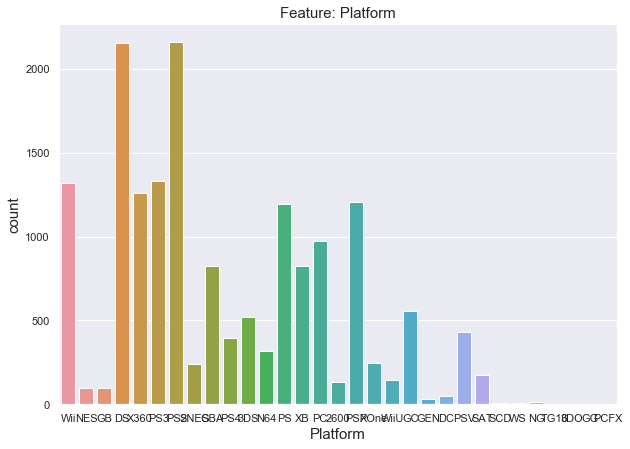

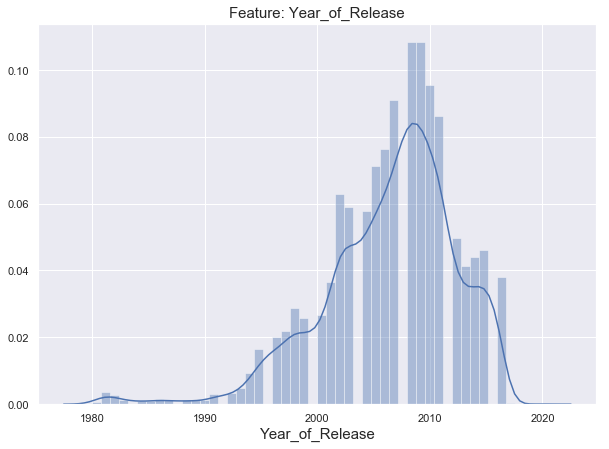

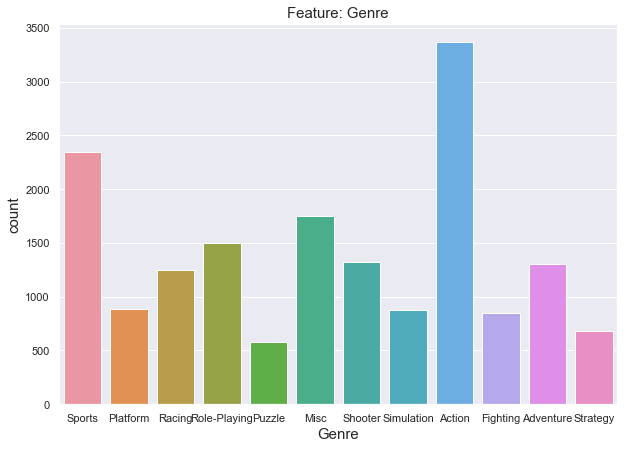

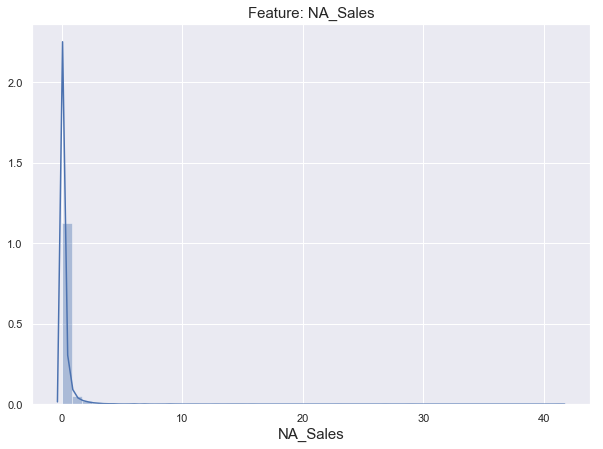

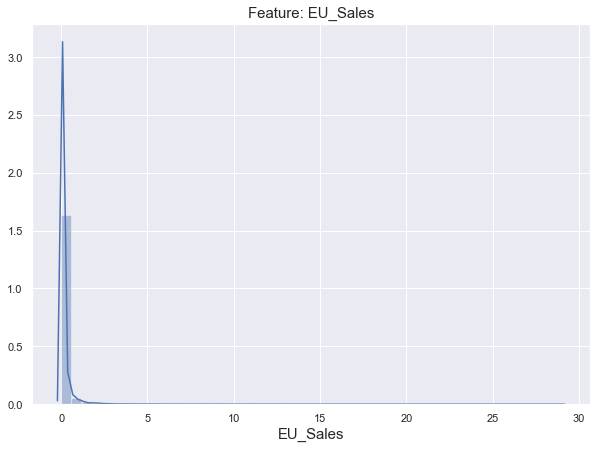

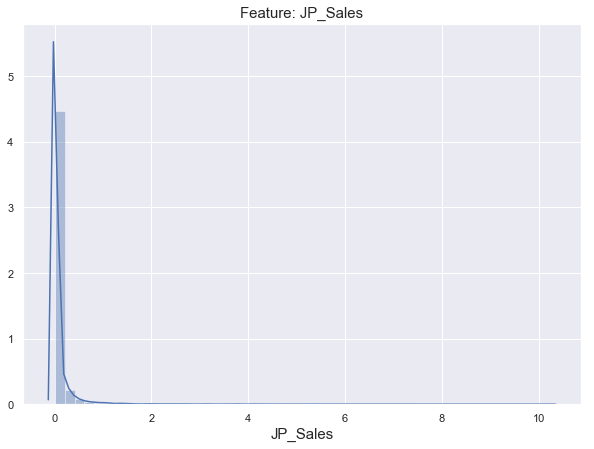

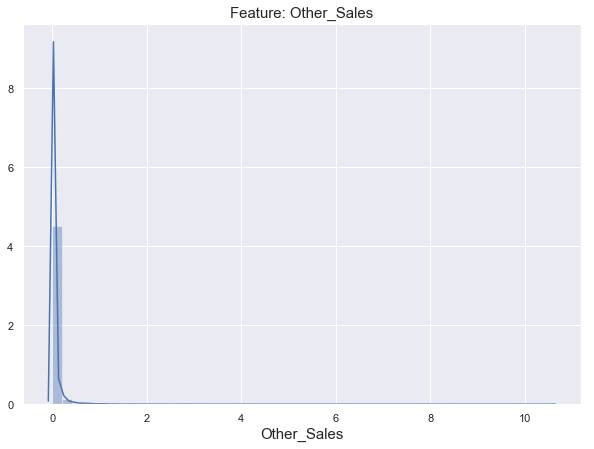

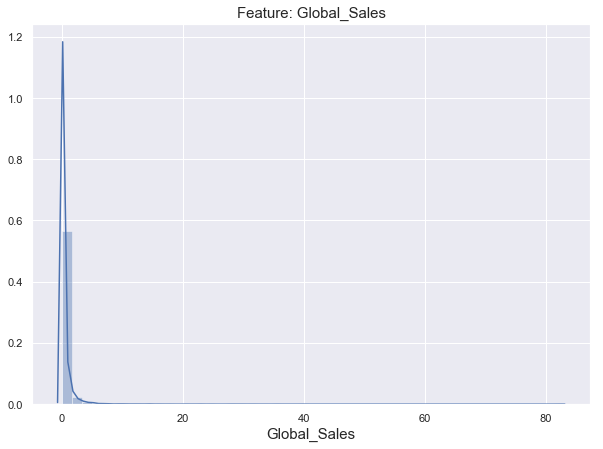

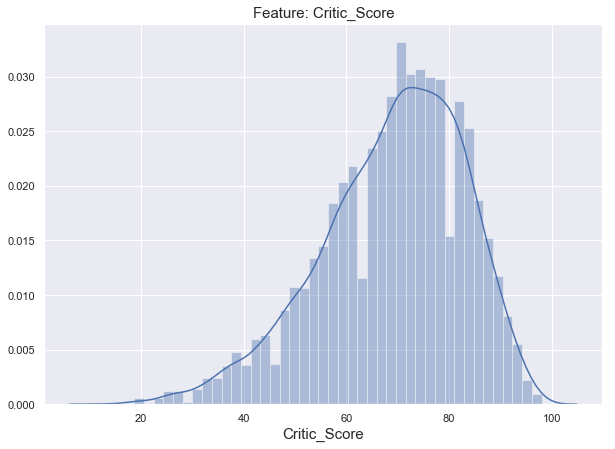

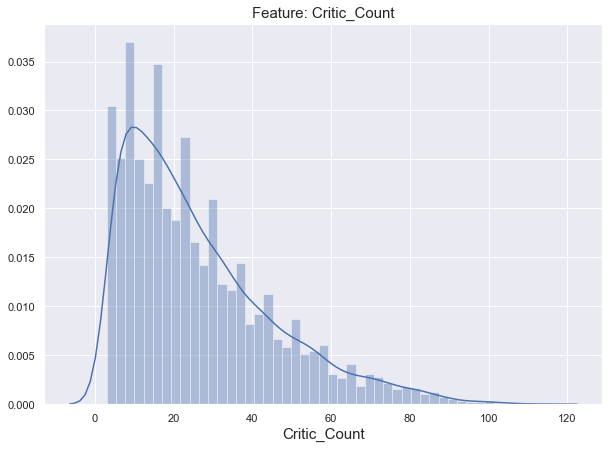

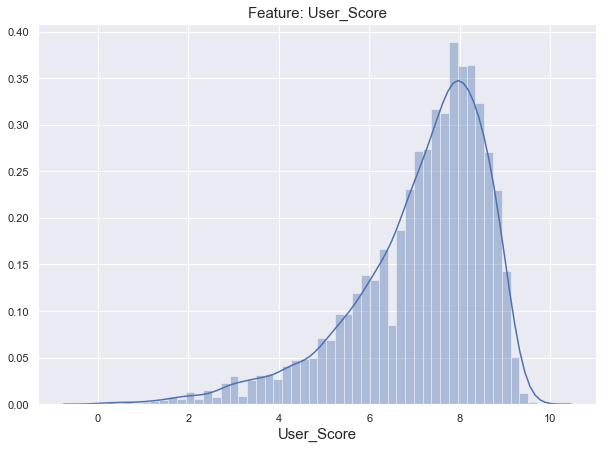

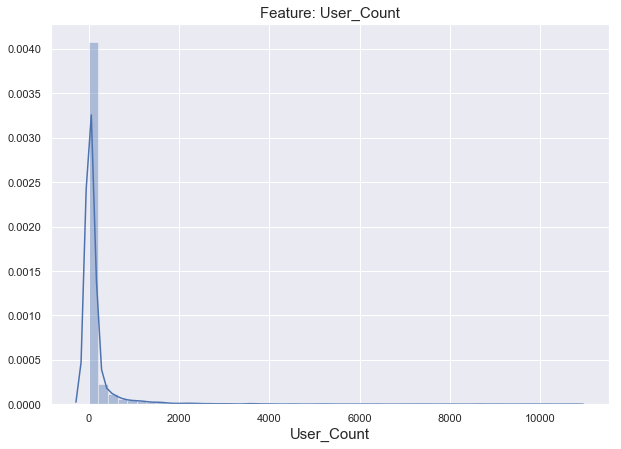

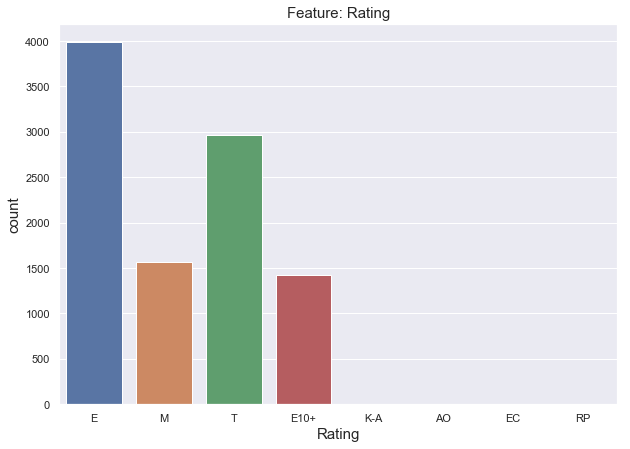

In [11]:
# Set graph background
sns.set(style="darkgrid")
sns.set_palette("muted")
sns.set(rc={'figure.figsize': (10, 7)})

ignore_cols = {"Name", "Publisher", "Developer"}

for feature_name in gaming_dataset.columns:

    if feature_name not in ignore_cols:
        plt.title("Feature: " + feature_name,
                  fontsize=15)
        # Display categorical
        if feature_name not in df_features.get_numerical_features():
            plt.ylabel("count", fontsize=15)
            sns.countplot(gaming_dataset[feature_name])
        
        # Display numerical
        else:
            bool_array = ~np.isnan(gaming_dataset[feature_name])
            sns.distplot(gaming_dataset[bool_array][feature_name])

        plt.xlabel(feature_name, fontsize=15)
        plt.show()
        plt.close()
        vertical_spacing(3)

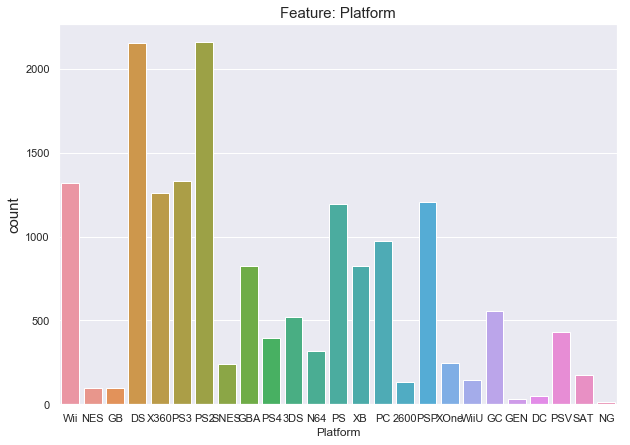

In [14]:
# Remove all less than threshold amount for better graphing
threshold = 10
value_counts = gaming_dataset["Platform"].value_counts()
to_remove = value_counts[value_counts <= threshold].index

plt.title("Feature: Platform",fontsize=15)

# Display categorical
plt.ylabel("count", fontsize=15)
sns.countplot(gaming_dataset["Platform"].replace(to_remove, np.nan))

### Center Numerical graphs

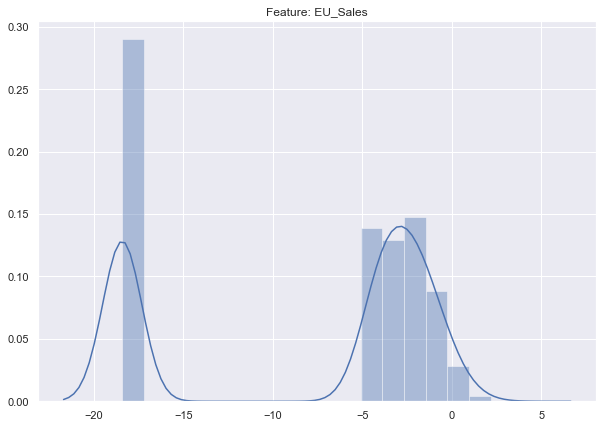

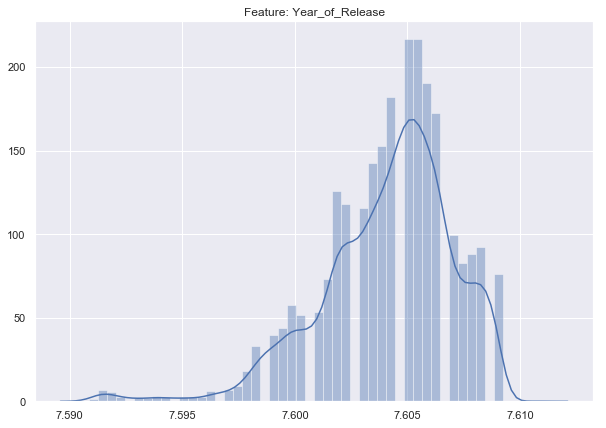

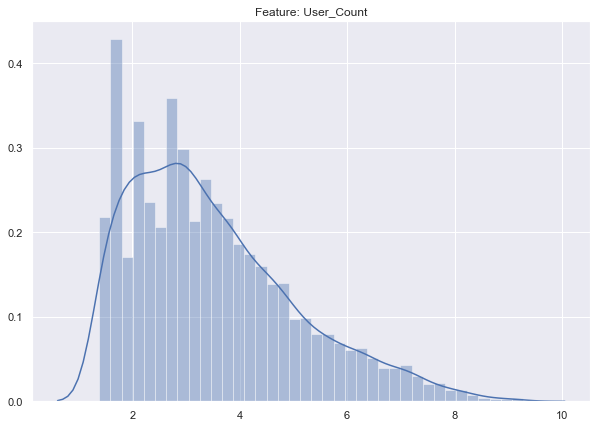

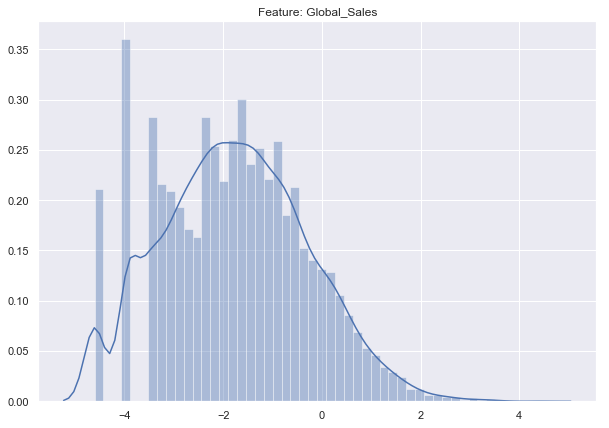

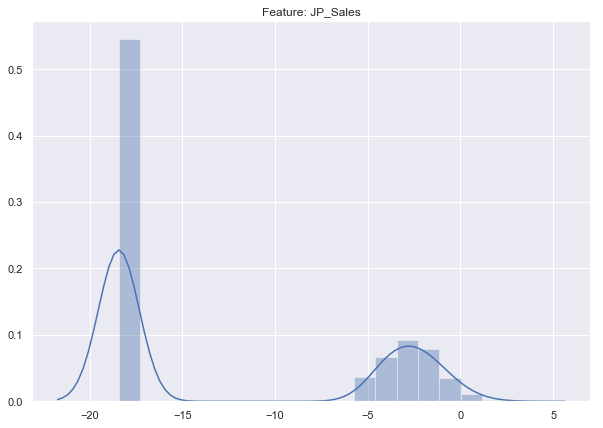

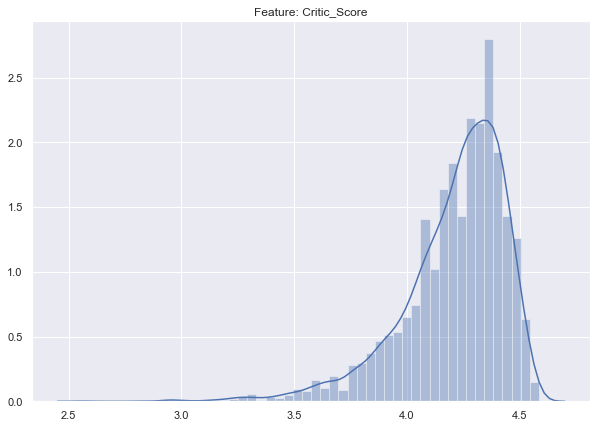

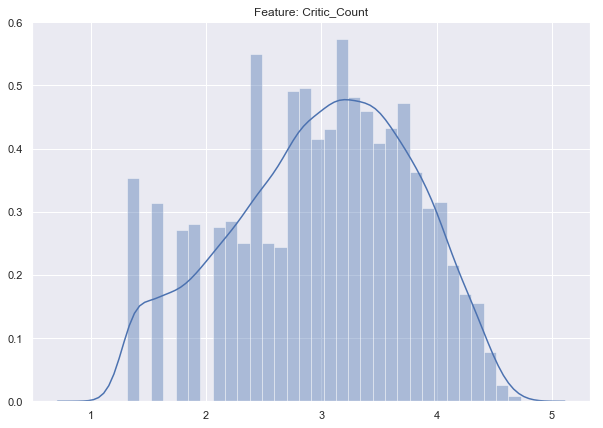

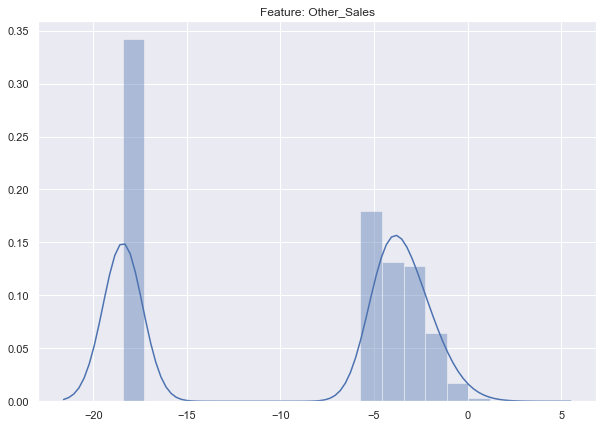

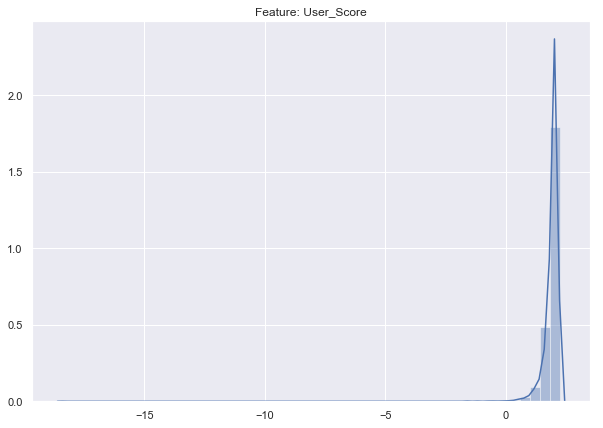

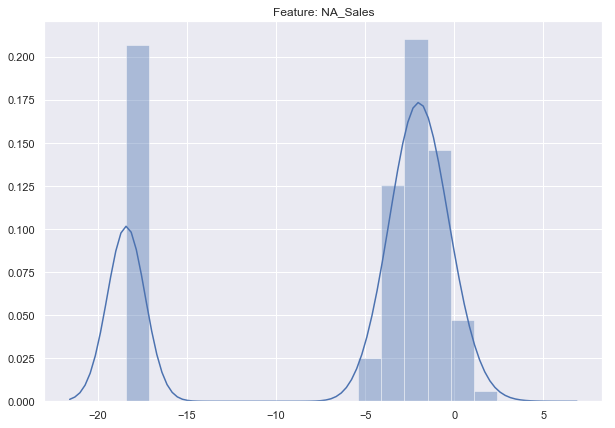

In [15]:
for feature_name in df_features.get_numerical_features():
    
    bool_array = ~np.isnan(gaming_dataset[feature_name])
    positive_only_vector = np.where(gaming_dataset[bool_array][feature_name] < 1e-5,
                                    1e-8, gaming_dataset[bool_array][feature_name])
    
    
    plt.title("Feature: " + feature_name)
    sns.distplot(np.log(positive_only_vector))
    plt.show()
    plt.close()

In [16]:
gaming_dataset.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

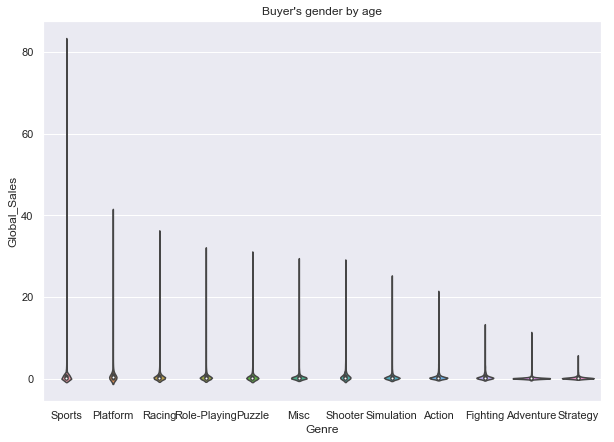

In [17]:
sns.set_palette("muted")
sns.set(rc={'figure.figsize':(10,7)})
sns.violinplot(x=gaming_dataset['Genre'],y=gaming_dataset['Global_Sales'])
plt.title("Buyer's gender by age")
plt.show()
plt.close()

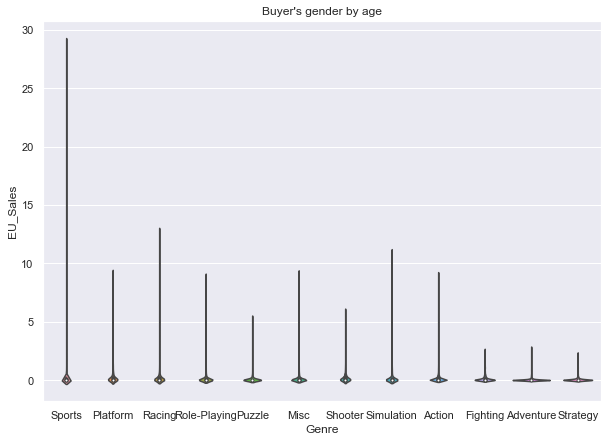

In [18]:
sns.set_palette("muted")
sns.set(rc={'figure.figsize':(10,7)})
sns.violinplot(x=gaming_dataset['Genre'],y=gaming_dataset['EU_Sales'])
plt.title("Buyer's gender by age")
plt.show()
plt.close()

#### Binning graphing sales

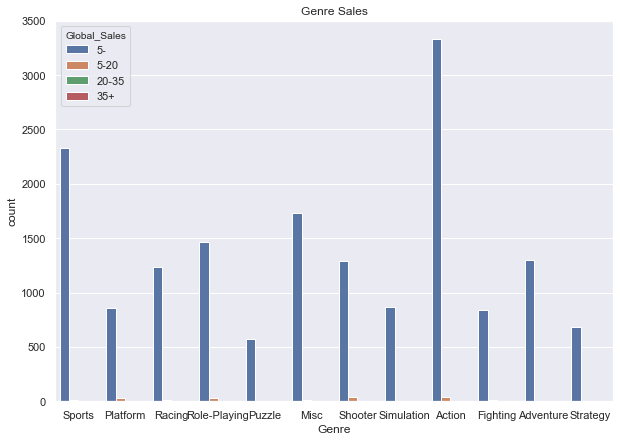

In [30]:
bins = [0,5,20,35,float("inf")]
labels = ["5-","5-20","20-35","35+"]

sns.set_palette("muted")
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(gaming_dataset['Genre'],hue=pd.cut(gaming_dataset["Global_Sales"], bins=bins, labels=labels))
plt.title("Genre Sales")
plt.show()
plt.close()

In [20]:
tmp_df = gaming_dataset[['Genre', 'Global_Sales']]

tmp_df['Global_Sales'] = pd.cut(gaming_dataset["Global_Sales"], bins=bins, labels=labels)

tmp_df = tmp_df[tmp_df['Global_Sales'] != "5-"]
tmp_df.head()

/Users/ericcacciavillani/anaconda3/envs/VideoGames/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Genre,Global_Sales
0,Sports,35+
1,Platform,35+
2,Racing,35+
3,Sports,20-35
4,Role-Playing,20-35


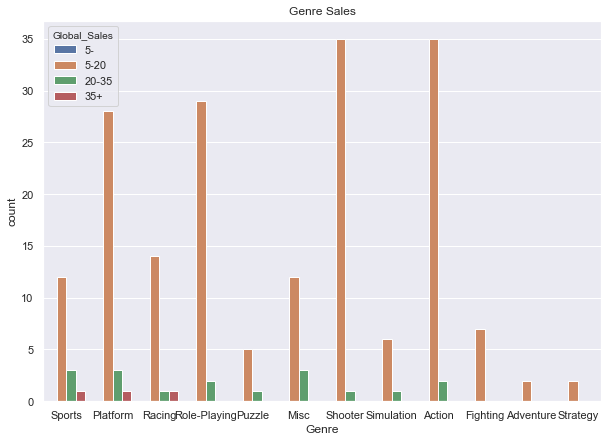

In [31]:
sns.set_palette("muted")
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(tmp_df['Genre'],hue=tmp_df['Global_Sales'])
plt.title("Genre Sales")
plt.show()
plt.close()

#### Looking at maxes

In [24]:
gaming_dataset.loc[gaming_dataset['Global_Sales'] == gaming_dataset['Global_Sales'].max()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E


In [25]:
gaming_dataset.loc[gaming_dataset['JP_Sales'] == gaming_dataset['JP_Sales'].max()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
gaming_dataset.loc[gaming_dataset['NA_Sales'] == gaming_dataset['NA_Sales'].max()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E


In [27]:
gaming_dataset.loc[gaming_dataset['EU_Sales'] == gaming_dataset['EU_Sales'].max()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E


In [28]:
gaming_dataset.loc[gaming_dataset['Other_Sales'] == gaming_dataset['Other_Sales'].max()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.4,0.41,10.57,20.81,95.0,80.0,9.0,1588.0,Rockstar North,M


In [29]:
gaming_dataset.loc[gaming_dataset['Critic_Score'] == gaming_dataset['Critic_Score'].max()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
51,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.07,0.14,1.03,11.01,98.0,86.0,7.9,2951.0,Rockstar North,M
57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.69,0.44,1.61,10.50,98.0,64.0,7.5,2833.0,Rockstar North,M
227,Tony Hawk's Pro Skater 2,PS,2000.0,Sports,Activision,3.05,1.41,0.02,0.20,4.68,98.0,19.0,7.7,299.0,Neversoft Entertainment,T
5350,SoulCalibur,DC,1999.0,Fighting,Namco Bandai Games,0.00,0.00,0.34,0.00,0.34,98.0,24.0,8.8,200.0,Namco,T


In [35]:
gaming_dataset.loc[gaming_dataset['User_Score'] == gaming_dataset['User_Score'].max()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14414,Breath of Fire III,PSP,2005.0,Role-Playing,Capcom,0.0,0.02,0.0,0.01,0.03,NaN,NaN,9.7,6.0,Capcom,T


In [32]:
gaming_dataset.shape

(16719, 16)

In [34]:
len(gaming_dataset["Name"].value_counts().index)

11562